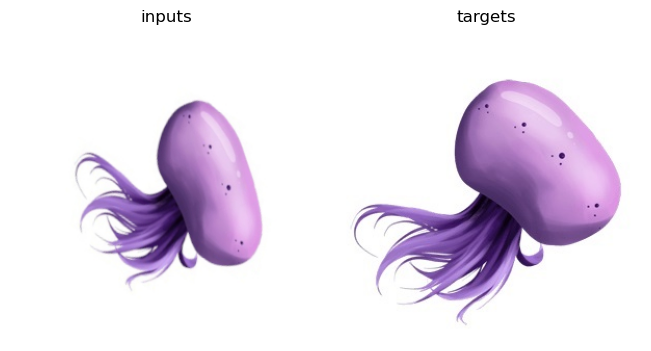

In [1]:
from glio.imports import *
from torchzero.nn.layers.affine import Affine
from torchzero.optim import SPSA, SignGD
from torchzero.optim.interfaces.suggest.trial import Trial
from torchzero.optim.interfaces.suggest.study import Study
from torchzero.optim.interfaces.suggest.samplers import AcceleratedRandomSearchSampler, RandomOptimizerSampler, SimulatedAnnealingSampler, ThresholdAcceptingSampler, RandomAnnealingSampler, FDSASampler


input = imreadtensor(r"C:\Users\nkshv\Pictures\idiotfleat.jpg")
target = imreadtensor(r"C:\Users\nkshv\Pictures\AA_AerofleetArt.jpg")

qimshow_grid([input, target], ['inputs', 'targets'], nrow=1)

In [2]:
criterion = lambda x, y: ((x - y) ** 2).mean()
x = znorm(input.unsqueeze(0).to(CUDA).float())
yhat = znorm(target.unsqueeze(0).to(CUDA).float())

def objective(trial: Trial):
    model = Affine().to(CUDA)

    lr = trial.suggest_float("lr", min = 0, max = 1)
    momentum = trial.suggest_float('momentum', min = 0, max = 1)

    opt = torch.optim.SGD(
        model.parameters(),
        lr = lr,
        momentum = momentum,
    )


    for step in range(50):
        def closure():
            opt.zero_grad()
            y = model(x)
            loss = criterion(y, yhat)
            loss.backward()
            return loss
        loss = opt.step(closure)

    return loss # type:ignore

study = Study(objective)
optimizer = AcceleratedRandomSearchSampler(study)
for step in range(100):
    optimizer.zero_grad()
    loss = optimizer.step(study)
    print(step, loss, end = '\r')

print(study.best_params)
print(study.best_value)

{'lr': 0.024262357503175735, 'momentum': 0.21407446265220642}
0.2775840163230896


In [2]:
criterion = lambda x, y: ((x - y) ** 2).mean()
x = znorm(input.unsqueeze(0).to(CUDA).float())
yhat = znorm(target.unsqueeze(0).to(CUDA).float())

def objective(trial: Trial):
    model = Affine().to(CUDA)

    lr = trial.suggest_float("lr", min = 0, max = 1, init = 0.3)
    momentum = trial.suggest_float('momentum', min = 0, max = 1, init=0.3)

    opt = torch.optim.SGD(
        model.parameters(),
        lr = lr,
        momentum = momentum,
    )


    for step in range(50):
        def closure():
            opt.zero_grad()
            y = model(x)
            loss = criterion(y, yhat)
            loss.backward()
            return loss
        loss = opt.step(closure)

    return loss # type:ignore

study = Study(objective)
optimizer = RandomOptimizerSampler(study, 6e-2)
for step in range(100):
    optimizer.zero_grad()
    loss = optimizer.step(study)
    print(step, loss, end = '\r')

print(study.best_params)
print(study.best_value)

{'lr': 0.02748332917690277, 'momentum': 0.24359716475009918}ensor(1.0324, device='cuda:0', grad_fn=<MeanBackward0>)
0.2875078022480011


In [6]:
criterion = lambda x, y: ((x - y) ** 2).mean()
x = znorm(input.unsqueeze(0).to(CUDA).float())
yhat = znorm(target.unsqueeze(0).to(CUDA).float())

def objective(trial: Trial):
    model = Affine().to(CUDA)

    lr = trial.suggest_float("lr", min = 0, max = 1, init = 0.3)
    momentum = trial.suggest_float('momentum', min = 0, max = 1, init=0.3)

    opt = torch.optim.SGD(
        model.parameters(),
        lr = lr,
        momentum = momentum,
    )


    for step in range(50):
        def closure():
            opt.zero_grad()
            y = model(x)
            loss = criterion(y, yhat)
            loss.backward()
            return loss
        loss = opt.step(closure)

    return loss # type:ignore

study = Study(objective)
optimizer = RandomAnnealingSampler( study, 100, lr = 0.2,)
for step in range(100):
    optimizer.zero_grad()
    loss = optimizer.step(study)
    print(step, loss, end = '       \r')

print(study.best_params)
print(study.best_value)

{'lr': 0.01859942078590393, 'momentum': 0.41354429721832275}      
0.2874329388141632


In [7]:
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

criterion = lambda x, y: ((x - y) ** 2).mean()
x = znorm(input.unsqueeze(0).to(CUDA).float())
yhat = znorm(target.unsqueeze(0).to(CUDA).float())

def objective(trial):
    model = Affine().to(CUDA)

    lr = trial.suggest_float("lr", 0, 1)
    momentum = trial.suggest_float('momentum', 0, 1)

    opt = torch.optim.SGD(
        model.parameters(),
        lr = lr,
        momentum = momentum,
    )


    for step in range(50):
        def closure():
            opt.zero_grad()
            y = model(x)
            loss = criterion(y, yhat)
            loss.backward()
            return loss
        loss = opt.step(closure)

    return loss # type:ignore

sampler = optuna.samplers.RandomSampler()
study = optuna.create_study(sampler = sampler)
study.optimize(objective, n_trials=100)
print(study.best_params)
print(study.best_value)

{'lr': 0.0157305083483823, 'momentum': 0.6441694371596373}
0.3090190887451172


In [4]:
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

criterion = lambda x, y: ((x - y) ** 2).mean()
x = znorm(input.unsqueeze(0).to(CUDA).float())
yhat = znorm(target.unsqueeze(0).to(CUDA).float())

def objective(trial):
    model = Affine().to(CUDA)

    lr = trial.suggest_float("lr", 0, 1)
    momentum = trial.suggest_float('momentum', 0, 1)

    opt = torch.optim.SGD(
        model.parameters(),
        lr = lr,
        momentum = momentum,
    )


    for step in range(50):
        def closure():
            opt.zero_grad()
            y = model(x)
            loss = criterion(y, yhat)
            loss.backward()
            return loss
        loss = opt.step(closure)

    return loss # type:ignore

study = optuna.create_study()
study.optimize(objective, n_trials=100)
print(study.best_params)
print(study.best_value)

{'lr': 0.025755265905759463, 'momentum': 0.5565571715190198}
0.27164986729621887
